# Predicting Bank Customer Churn

In this project, using the dataset from Kaggle (https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers),  different supervised learning models are used to predict customers that are likely to churn in the future. Top factors that influence user retention are analyzed. 

* [Part I: Exploring Data](#Part-I:-Exploring-Data)
* [Part II: Preprocessing Features](#Part-II:-Preprocessing-Features)
* [Part III: Model Training and Results Evaluation](#Part-III:-Model-Training-and-Result-Evaluation)
* [Part IV: Feature Selection](#Part-IV:-Feature-Selection)

Import Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-muted')

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Part I: Exploring Data

In [8]:
# Take a glance at the data
churn_df = pd.read_csv('bank.data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# Check unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
# Get target variable: Exited or not.
y = churn_df['Exited']

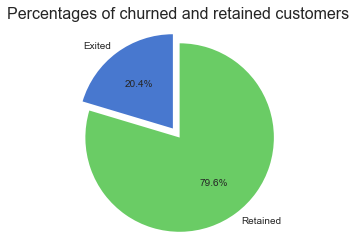

In [12]:
# check and visualize the propotion of y = 1
# python package: imbalance-learn
labels = 'Exited', 'Retained'
sizes = [y.sum(), y.shape - y.sum()]
explode = (0, 0.12)
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
plt.title("Percentages of churned and retained customers", size = 16)
plt.show()

In [13]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 
          'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


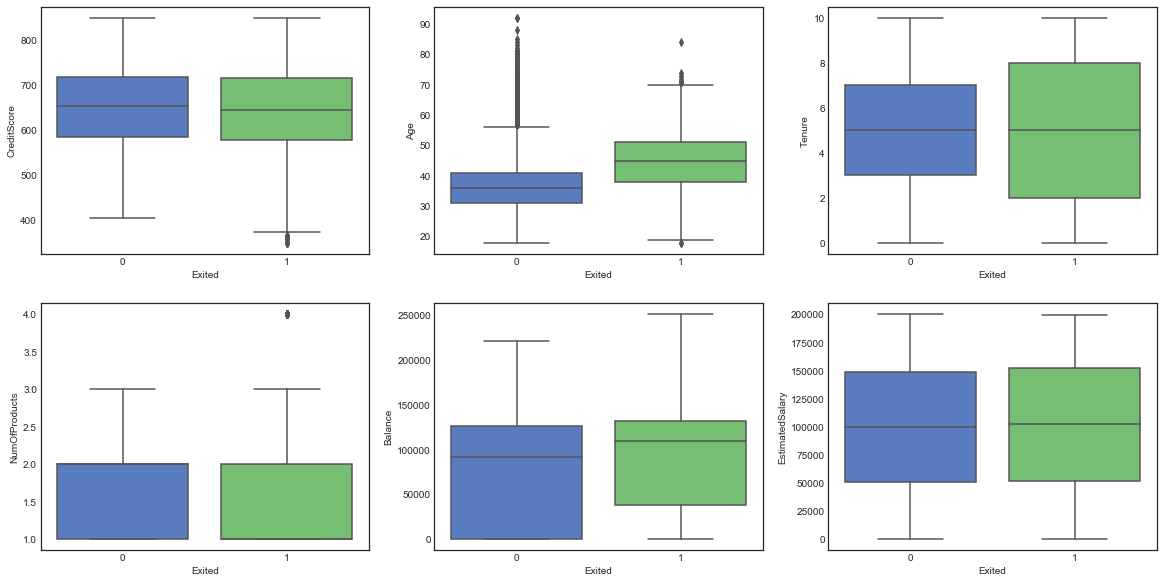

In [15]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
_,ax = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=ax[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=ax[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=ax[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=ax[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=ax[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=ax[1][2])

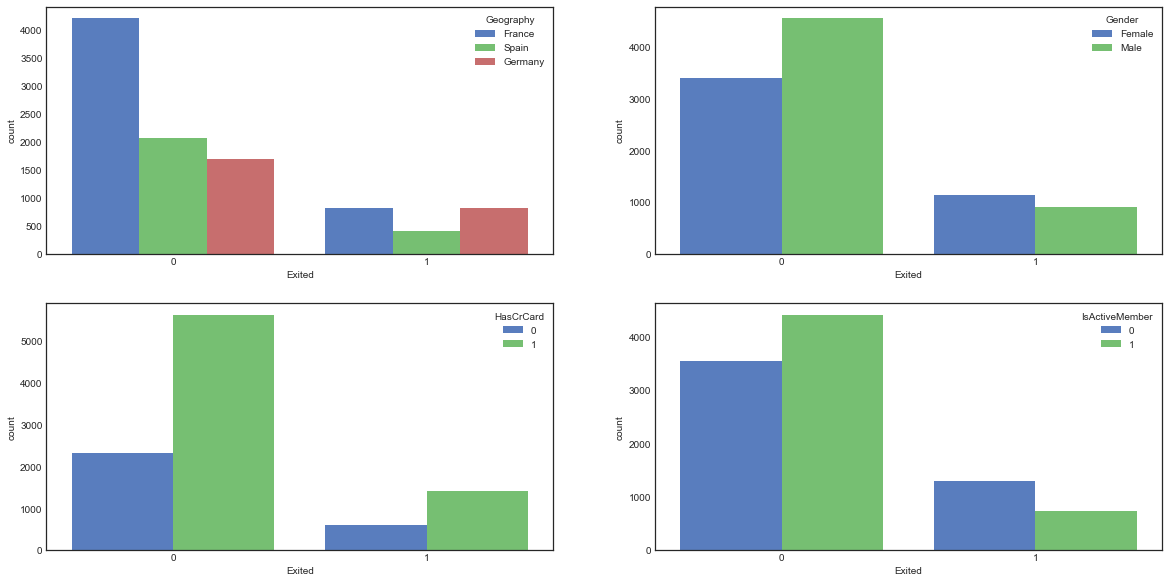

In [16]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

In [17]:
# check correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


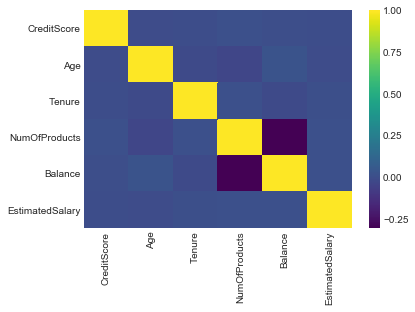

In [18]:
# show heapmap of correlation matrix
sns.heatmap(corr_score, cmap = 'viridis')

# Part II: Preprocessing Features

## This part includes feature encoding and feature scaling

In [19]:
# one hot encoding for gender and geography
churn_df = pd.get_dummies(churn_df, columns=['Gender'])
churn_df = pd.get_dummies(churn_df, columns=['Geography'])

In [20]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
7,8,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,10,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0


In [21]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


# Part III: Model Training and Result Evaluation

## Train-test splitting

In [23]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y)

print('training data has ' + str(X_train.shape[0]) + 
      ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + 
      ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 13 features
test data has 2500 observation with 13 features


## Data Scaling

In [24]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Selection: Logistic Regression (LR), K Nearest Neighbors (KNN), and Random Forest (RF), and Extreme Gradient Boosting Decision Tree (XGBoost)

In [25]:
# build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Fit Extreme Gradient Boost Classifier
classifier_XGB = XGBClassifier()

## Accuracy of Logistic Regression

In [26]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.814

In [29]:
# Use 10-fold Cross Validation to get the accuracy for different models
# Help select models 
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.8069241  0.81491345 0.80666667 0.792      0.812      0.79733333
 0.81333333 0.81466667 0.811749   0.81842457]
Model accuracy of Logistic Regression is 0.8088011114686428
[0.83355526 0.84420772 0.82266667 0.83733333 0.82933333 0.804
 0.82533333 0.824      0.82376502 0.81975968]
Model accuracy of KNN is 0.826395434895588
[0.85086551 0.8575233  0.86533333 0.84933333 0.84533333 0.83733333
 0.84533333 0.86533333 0.84646195 0.8518024 ]
Model accuracy of Random Forest is 0.8514653167383409


## Use Grid Search to Find Optimal Hyperparameters

In [30]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print('\t' + param_name + ':' + str(best_parameters[param_name]))

## Find Optimal Hyperparameters - Logistic Regression

In [31]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10) 
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8089333333333333
Best parameters set:
	C:1
	penalty:l1


In [33]:
# best model
best_LR_model = Grid_LR.best_estimator_

## Find Optimal Hyperparameters: KNN

In [34]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9,11,13] # only choose odd numbers in knn
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8316
Best parameters set:
	n_neighbors:13


In [36]:
best_KNN_model = Grid_KNN.best_estimator_

## Find Optimal Hyperparameters: Random Forest

In [38]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [20,40,60]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [39]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8625333333333334
Best parameters set:
	n_estimators:60


In [40]:
# best random forest
best_RF_model = Grid_RF.best_estimator_
best_RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Find Optimal Hyperparameters: XGBoost

In [41]:
# Possible hyperparamter options for XGBoost
# Choose the number of trees, max depth and other
parameters = {
    'n_estimators': [20,40,60], 
    'max_depth': np.arange(5, 10)
}
Grid_XGB = GridSearchCV(XGBClassifier(),parameters, cv=10)
Grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [42]:
# best number of tress
print_grid_search_metrics(Grid_XGB)

Best score: 0.8653333333333333
Best parameters set:
	max_depth:5
	n_estimators:20


In [43]:
# best random forest
best_XGB_model = Grid_XGB.best_estimator_
best_XGB_model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

## Model Evaluation - Precision, Recall, Accuracy, and F1 score

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2/(1/precision + 1/recall)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("F1 score is " + str(f1))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [45]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("XGBoost", confusion_matrix(y_test, best_XGB_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8548
precision is: 0.737012987012987
recall is: 0.44597249508840864
F1 score is 0.5556915544675642

Logistic Regression
Accuracy is: 0.8144
precision is: 0.6178010471204188
recall is: 0.2318271119842829
F1 score is 0.33714285714285713

K nearest neighbor
Accuracy is: 0.832
precision is: 0.6909871244635193
recall is: 0.3163064833005894
F1 score is 0.43396226415094347

XGBoost
Accuracy is: 0.856
precision is: 0.7264437689969605
recall is: 0.46954813359528486
F1 score is 0.5704057279236276



## Model evaluation - ROC & AUC

In [46]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of all the models
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
y_pred_xgb = best_XGB_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)
fpr_xgb, tpr_xgb, thresh = roc_curve(y_test, y_pred_xgb)

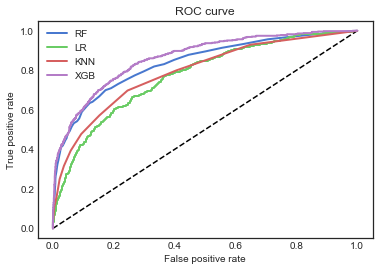

In [47]:
# ROC curve of all the models
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF', linewidth = 2)
plt.plot(fpr_lr, tpr_lr, label='LR', linewidth = 2)
plt.plot(fpr_knn, tpr_knn, label='KNN', linewidth = 2)
plt.plot(fpr_xgb, tpr_xgb, label='XGB', linewidth = 2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [48]:
# AUC scores
print('AUC RF: ' + str(metrics.auc(fpr_rf,tpr_rf)))
print('AUC LR: ' + str(metrics.auc(fpr_lr,tpr_lr)))
print('AUC KNN: ' + str(metrics.auc(fpr_knn,tpr_knn)))
print('AUC XGB: ' + str(metrics.auc(fpr_xgb,tpr_xgb)))

AUC RF: 0.8362148331539078
AUC LR: 0.7714311651942583
AUC KNN: 0.7894360575438195
AUC XGB: 0.8629120827614245


# Part IV: Feature Selection

##  Feature Selection for Logistic Regression Model

## Add L1 regularization to logistic regression and check the coef for feature selection

In [49]:
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X.shape[1]):
    print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7495
IsActiveMember : -0.524
Geography_Germany : 0.3171
Gender_Female : 0.2282
Balance : 0.159
CreditScore : -0.0569
NumOfProducts : -0.0529
Tenure : -0.0384
Gender_Male : -0.0259
EstimatedSalary : 0.0202
HasCrCard : -0.013
Geography_France : -0.0122
Geography_Spain : 0.0


## Add L2 regularization to logistic regression and check the coef for feature selection

In [50]:
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42) #C = 1/\lambda 
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Geography_Germany : 0.2279
Balance : 0.162
Gender_Female : 0.13
Gender_Male : -0.13
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
EstimatedSalary : 0.0272
HasCrCard : -0.0199


## Feature Importance from Random Forest and XGBoost Models

In [51]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
    print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2327
EstimatedSalary : 0.1499
CreditScore : 0.1481
Balance : 0.1448
NumOfProducts : 0.1343
Tenure : 0.0828
IsActiveMember : 0.037
Geography_Germany : 0.0214
HasCrCard : 0.0168
Geography_France : 0.0091
Gender_Male : 0.0084
Gender_Female : 0.0074
Geography_Spain : 0.0073


In [52]:
# check feature importance of xgboost for feature selection
XGB = XGBClassifier()
XGB.fit(X, y)

importances = XGB.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by XGBoost Model:")
for ind in range(X.shape[1]):
    print ("%s : %.4f" %(X.columns[indices[ind]],importances[indices[ind]]))

Feature importance ranking by XGBoost Model:
NumOfProducts : 0.2946
IsActiveMember : 0.1816
Age : 0.1233
Geography_Germany : 0.0930
Gender_Female : 0.0537
Balance : 0.0502
Geography_Spain : 0.0411
Geography_France : 0.0340
EstimatedSalary : 0.0337
CreditScore : 0.0333
Tenure : 0.0318
HasCrCard : 0.0297
Gender_Male : 0.0000
